In [1]:
# HIDDEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib import patches
from datascience import *
%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Empirical Demand Curves

*This deck largely mirrors parts 2-3 of the [demand chapter](https://data-88e.github.io/textbook/content/01-demand/index.html):*
- *An Empirical Demand Curve*
- *Log-log and Semi-log Demand Curves*

## Avocados

Let's examine some historical data on non-organic avocado prices and sales volumes in San Francisco from 2015 to 2018. The original dataset is taken from Kaggle and can be found [here](https://www.kaggle.com/neuromusic/avocado-prices).


In [2]:
avocados = Table.read_table("avocados.csv") # is it avocados or avocadoes?
avocados

Date,Average Price,Total Volume
2015-12-27,1.05,692206
2015-12-20,1.15,637091
2015-12-13,1.22,616016
2015-12-06,1.06,694982
2015-11-29,1.05,651639
2015-11-22,1.04,709444
2015-11-15,0.99,775849
2015-11-08,1.4,599884
2015-11-01,0.97,869927
2015-10-25,1.55,561342


## Visualizing the Relationship between Price and Quantity

We would expect to see a downward-sloping line between price and quantity; if a product's price increases, consumers will purchase less, and if a product's price decreases, then consumers will purchase more. 

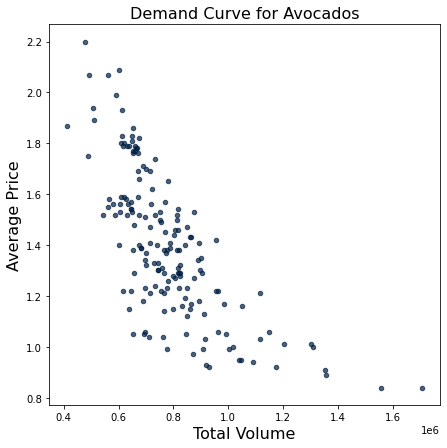

In [3]:
avocados.scatter("Total Volume", "Average Price", width = 7, height = 7)
plt.title("Demand Curve for Avocados", fontsize = 16);

## Linear Demand Curves

### Demand with Price as a Function of Quantity

First, we will fit a demand curve expressed in terms of price as a function of quantity. This aligns with the axes of supply and demand curves, in which the quantity is on the x-axis and price is on the y-axis:

$$P(Q) = m\cdot Q + b$$

We will now quantify our demand curve using NumPy's [`np.polyfit` function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). 

It takes 3 parameters:
- array of x-coordinates
- array of y-coordinates
- degree of polynomial 

With degree 1, `np.polyfit` returns an array of size 2, where the first element is the slope and the second is the $y$-intercept.

In [4]:
slope, intercept = np.polyfit(avocados.column("Total Volume"), avocados.column("Average Price"), 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -1.0909269659806726e-06
The intercept is: 2.2495304122570343


Our demand curve is $P(Q) = -0.00000109Q+ 2.2495$:
- The slope is -0.00000109 
- The $y$-intercept is 2.2495

This means that as the quantity demanded increases by 1 unit (in this case, 1 avocado), we would expect to see price to decrease by 0.00000109 units (in this case, \$0.000214). 

#### Plotting our demand curve

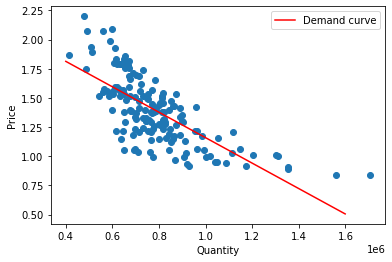

In [5]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
quantities = np.arange(400000, 1600000, 1000)
predicted_prices = slope * quantities + intercept
plt.plot(quantities, predicted_prices, color = 'red', label = "Demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

### Demand with Quantity as a Function of Price

Our interpretation of the demand curve and its slope above was probably not quite intuitive: changes in quantity demanded likely do not trigger changes in price, but instead it is the other way around. In addition, the slope was tiny: the marginal increase of one additional avocado sold had very little effect from the change in price. 

Thus, it is more intuitive to think the effect a one dollar change in price has on the quantity demanded, and to flip our axes:

$$D(P) = Q(P) = m\cdot P + b$$

One key thing to remember: our axes are flipped for this demand curve!

#### Fitting our data using this function, we get:

In [6]:
slope, intercept = np.polyfit(avocados.column("Average Price"), avocados.column("Total Volume"), 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -476412.7189820771
The intercept is: 1446951.6408050181


Our demand curve is roughly $Q(P) = -476413P+ 1446952$:
- The slope is -476413 
- The $y$-intercept is 1446952

This means that as the price increases by 1 unit (in this case, \$1), we would expect to see quantity demanded to decrease by 476413 units (in this case, 476413 avocados). 

*Note that this demand curve is not the same as the previous demand curve! It is not simply the inverse of the previous demand curve.*

Plotting this line on a graph, we see a slightly different demand curve.

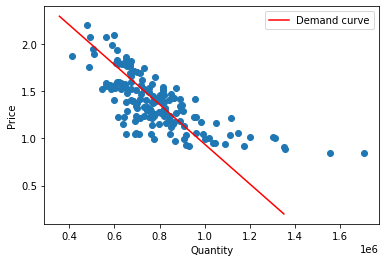

In [7]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.2, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Demand curve")

plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

### A Large Caveat
So far, we have examined demand curves assuming that they were linear: specifically, we've assumed that the relationship between quantity demanded and price was linear: for a \$1 change in price, we can expect a fixed change in units demanded at any price level.

Is this intuitively true?

As humans, we think about changes as proportions. What this implies is that these curves should be exponential in nature: at higher prices, a larger change in price will yield the same change quantity as compared to that in lower prices. 

Perhaps a better model for demand, then, is that a 1\% change in price will lead to a fixed absolute change in units demanded, or a fixed percentage change in units demanded. 

To model this, we turn to log-log and semi-log demand curves, respectively.

## An Important Aside: Using Logarithms for Proportional Changes

Let's consider how the variable GDP behaves.

GDP tends to grow by a certain percent each year; no one is particularly interested in how *much* GDP changes from one year to the next, or from one country to another, but rather by *what percent* it changes.


If you were to plot GDP over time for a country, it might look something like this:

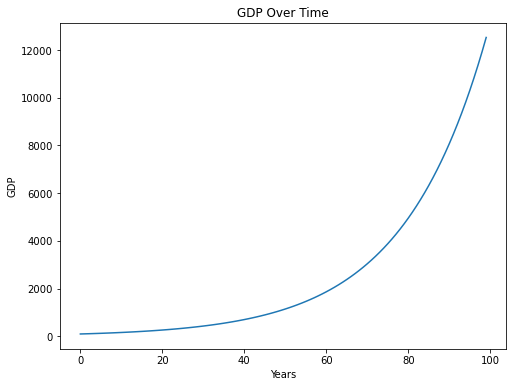

In [8]:
GDPs = make_array(100)
for _ in np.arange(99):
    GDPs = np.append(GDPs, GDPs.item(-1) * 1.05) 
plt.figure(figsize=(8,6))
plt.plot(np.arange(100), GDPs)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP Over Time');

This relationship is fundamentally non-linear.

However, for variables that change by proportions we can apply a log transformation to make the relationship linear. 

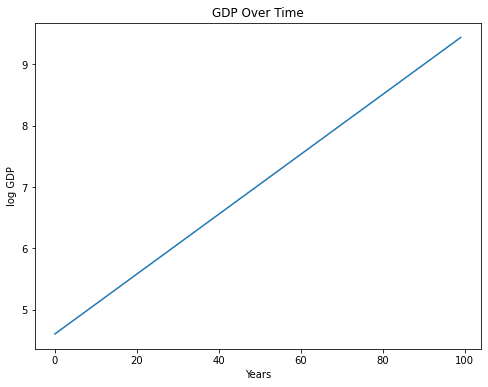

In [9]:
ln_GDPs = np.log(GDPs)

plt.figure(figsize=(8,6))
plt.plot(np.arange(100), ln_GDPs)
plt.xlabel('Years')
plt.ylabel('log GDP')
plt.title('GDP Over Time');

We've now uncovered a linear relationship between years and GDP! You can interpret the slope of this line as the approximate *percent change* in GDP for an increase in one year (you will later see why the slope is not exactly 0.05). To verify:

In [10]:
print('Slope between years 0 and 1: ', ln_GDPs[1] - ln_GDPs[0])

Slope between years 0 and 1:  0.04879016416943127


To generalize our results, taking the natural log of a variable allows us to interpret its change as a percentage change instead of an absolute change:

$$\text{slope} = \frac{\text{Change in GDP %}}{\text{Change in year}} \approx \frac{\text{Change in log-GDP} \times 100}{\text{Change in year}} $$

## Semi-log Demand Curves

Suppose that a change in price by \$1 leads to a m\% change in quantity demanded. 

This means that our slope would be:

$$\text{slope} = \frac{m \text{% change in quantity}}{\text{\$1 change in price}}\approx \frac{m \times 0.01 \text{ change in log-quantity}}{\text{\$1 change in price}} $$



We have to log transform our quantity-demanded variable to capture the above relationship. This is known as the semi-log demand curve, in which the price and log-quantity are linearly related:

$$\ln{D(P)} = m\cdot P + b$$


Let's gain some more intuition of this relationship. By exponentiating both sides, this is equivalent to:

$$\begin{align*}
\ln{D(P)} &= m\cdot P + b \\
D(P) &= e^{m\cdot P + b}\\
&= e^be^{m\cdot P } \\
\end{align*}$$

What do the slope and intercept represent? 

$b$ (specifically $e^b$) corresponds to the 'baseline' quantity demanded when price is 0, since $e^{m \cdot P} = e^0 = 1$. 

$m$ corresponds roughly to how much a one dollar change in price will lead to a percentage change in quantity demanded.

To see this, imagine that P goes up by one dollar such that we have:

$$
\begin{align*}
D(P+1) &= e^be^{m \cdot (P+1) }  \\
&= e^be^{m + m \cdot P }\\
&= e^be^me^{m \cdot P }\\
&= e^mD(P) \\
&\approx (1+m)D(P)
\end{align*}$$

The last line relies on the fact $e^{x} \approx (1+x)$ when $x$ is small. 

Our results leads to the caveat that our transformation is only approximate and only valid when our $m$ is small. 

### Visualizing the Semi-log Relationship
Plotting $D(P) = e^be^{m\cdot P}$, we get:

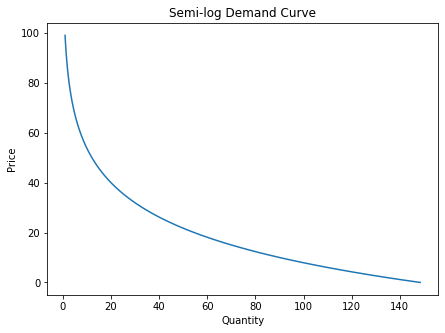

In [11]:
m = -0.05
b = 5
price = np.arange(0,100) 
quantity = (np.e ** (price * m)) * (np.e ** b) 
plt.figure(figsize=(7,5))
plt.plot(quantity, price)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Semi-log Demand Curve');

### Fitting Semi-log to Avocados

In [12]:
log_quantity = np.log(avocados.column("Total Volume"))
slope, intercept = np.polyfit(avocados.column("Average Price"), log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.5792670374517255
The intercept is:  14.352506861683818


For every one dollar change in price of avocados, we would expect the change in quantity demanded to decrease by 57%. 

*Take this result with a grain of salt – recall that our approximation typically is valid for small values of $m$, and here our $m=-0.57$*. 

#### Plotting on log quantity

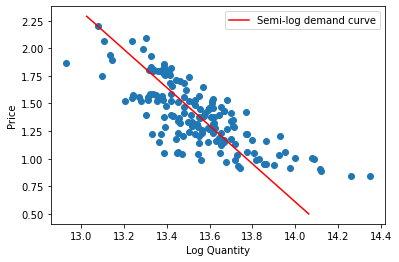

In [13]:
plt.scatter(log_quantity, avocados.column("Average Price"))
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Log Quantity")
plt.ylabel("Price")
plt.legend();

#### Plotting without axes transformations

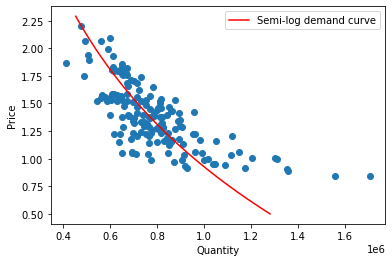

In [14]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = np.e ** (slope * prices + intercept)
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

## Log-log Demand Curves

Now suppose that a 1% change in price leads to a m% change in quantity demanded. 

This means that our slope would be:

$$\text{slope} = \frac{m \text{% change in quantity}}{1 \text{% change in price}} \approx \frac{m \times 0.01 \text{ change in log-quantity}}{ 0.01 \text{ change in log-price}} = \frac{\text{change by } m  \text{ in log-quantity}}{\text{ change by 1 in log-price}}$$

In this case, we have to log transform both our quantity-demanded variable as well as price variable to capture the above relationship. This is known as the log-log demand curve, in which the log-price and log-quantity are linearly related:

$$\ln{D(P)} = m\cdot\ln{P} + b$$


Let's gain some more intuition of this relationship. By exponentiating both sides, this is equivalent to:

$$\begin{align*}
D(P) &= e^{m\cdot\ln{P} + b}\\
&= e^be^{m\cdot\ln{P}} \\
&= e^b(e^{\ln{P}})^m \\
&= e^bP^m \\
\end{align*}$$

In this setup, $b$ does not have as clear a meaning. For $m$, we can once again suppose that P goes up by one dollar:

$$\begin{align*}
D(P+1) &= e^b(P+1)^m \\
&\approx e^b (1+m)P^m\\
&\approx (1+m) D(P) 
\end{align*}$$

Where we utilize the approximation that $(P+1)^m \approx P^m \times (1+m)$. Our caveat from the previous section about $m$ being small continues to be in place here: typically, we do not want our $m$ to be larger than $0.2$, or else the approxmation will fall apart.


### Visualizing the Log-log Relationship
Plotting $D(P) = e^bP^m$, we get:

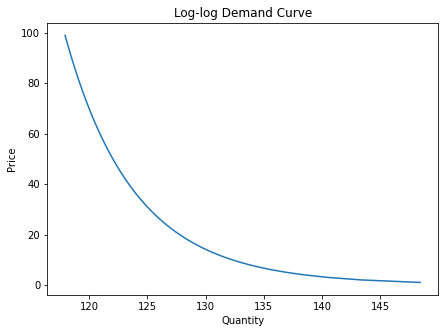

In [15]:
m = -0.05
b = 5
price = np.arange(0,100)
quantity = (price ** m) * (np.e ** b)
plt.figure(figsize=(7,5))
plt.plot(quantity, price)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Log-log Demand Curve');

#### A caveat about our log-log model 
Since our model is ultimately linear between log-price and log-quantity, the slope of log-price to log-quantity is always the same. 

This means that at any price level, we assume a 1% change in price will yield the same percentage change in quantity. 

This is also known as fixed elasticities.

### Elasticities

Elasticity is defined: 
$$\varepsilon = \frac{\Delta \% \text{Quantity}}{\Delta \% \text{Price}}$$

Similarly, in point-slope form: 
$$\varepsilon = \frac{\frac{\Delta Q}{Q}}{\frac{\Delta P}{P}} = \frac{\Delta Q}{\Delta P} \frac{P}{Q}$$

Elasticity behaves like the slope in calculus; thus when approximating using the point-slope formula it is typically only valid in small % changes of quantity or price. 


Elastic demand: $\varepsilon > 1$
- % change in price leads to a greater % change in quantity
- Profit increases from a decrease in price
- Examples: McDonalds, Toyota Prius, electronic devices

Inelastic demand: $\varepsilon < 1$
- % change in price leads to a smaller % change in quantity
- Profit decreases from a decrease in price
- Examples: insulin, gasoline, cigarettes

Consider the log-log demand curve, which assumes constant elasticity:

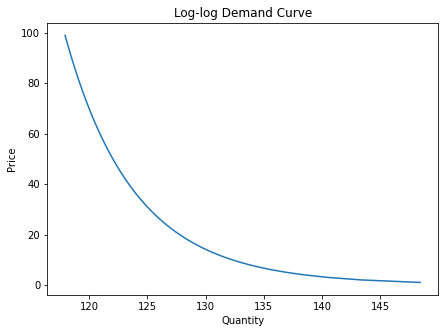

In [16]:
m = -0.05
b = 5
price = np.arange(0,100)
quantity = (price ** m) * (np.e ** b)
plt.figure(figsize=(7,5))
plt.plot(quantity, price)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Log-log Demand Curve');

Now consider the linear demand curve; which segments are elastic and which are inelastic?

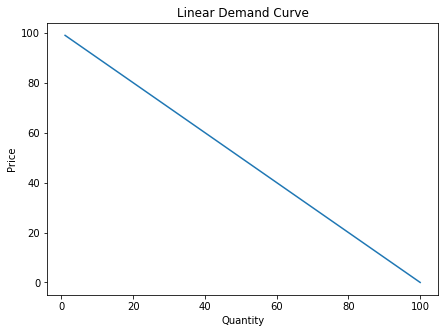

In [17]:
price = np.arange(0,100)
quantity = -1 * price + 100
plt.figure(figsize=(7,5))
plt.plot(quantity, price)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Linear Demand Curve');

### Fitting Log-log to Avocados

In [18]:
log_quantity = np.log(avocados.column("Total Volume"))
log_price = np.log(avocados.column("Average Price"))
slope, intercept = np.polyfit(log_price, log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.8157285894758811
The intercept is:  13.798460905495741


For every 1% change in price of avocados, we would expect the change in quantity demanded to decrease by $-0.816\%$. 

Is demand elastic or inelastic?

#### Plotting log-log demand curve with both axes log-transformed

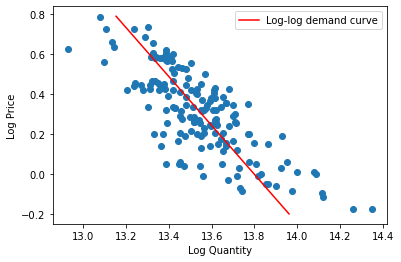

In [19]:
plt.scatter(log_quantity, log_price)
prices = np.arange(-0.2, 0.8, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")

plt.xlabel("Log Quantity")
plt.ylabel("Log Price")
plt.legend();

#### Plotting without axes transformations

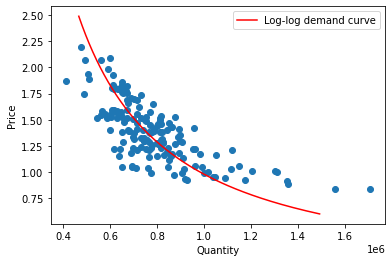

In [20]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.6, 2.5, 0.01)
predicted_quantities = (np.e ** intercept) * (prices ** slope)
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

## Which Model is Better: Linear, Semi-log, or Log-log? 

 
There is no correct answer here, in fact justifying one approach over another is surprisingly profound. 

- One way to approach this is to look at the graphs produced above and which red line goes through our data points "best" (but what does "best" mean? We'll save this for another day...)
- Another approach is to utilize our real-world knowledge to conclude which relationship is more accurate: do consumers react similarly to price changes that are in a proportion manner or in a absolute manner? This may also depend on the price, the promotion around it, the product itself, and many other factors. 

### An Afterword
This example highlights how ambiguity is a big part of doing data science. We can approach ambiguity with statistical methods and with domain knowledge. Either way, as long as you can ultimately justify your approach, that is what is key in conducting robust data science. 